In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('whiteballs.jpg', 0)
img.shape

(1512, 2016)

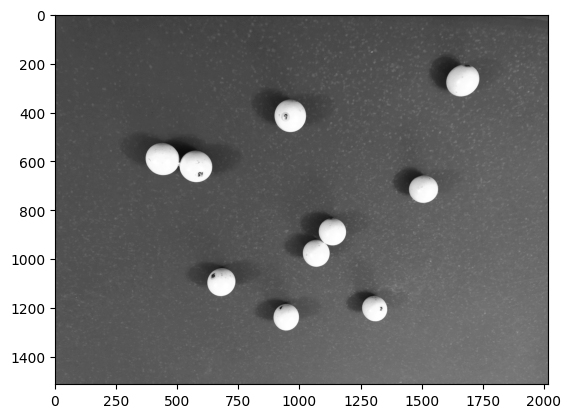

In [5]:
plt.imshow(img, cmap="gray")

In [6]:
edges = cv2.Canny(img, 50, 100)

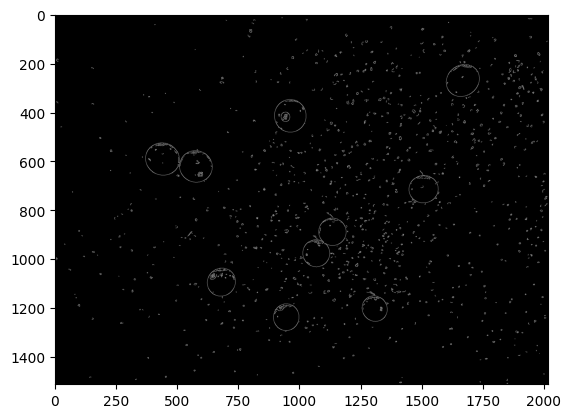

In [7]:
plt.imshow(edges, cmap="gray")

In [8]:
img = cv2.imread('whiteballs.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img2[200:300,:,1] = img2[200:300,:,1] * 1.15
img2 = cv2.cvtColor(img2, cv2.COLOR_HSV2BGR)

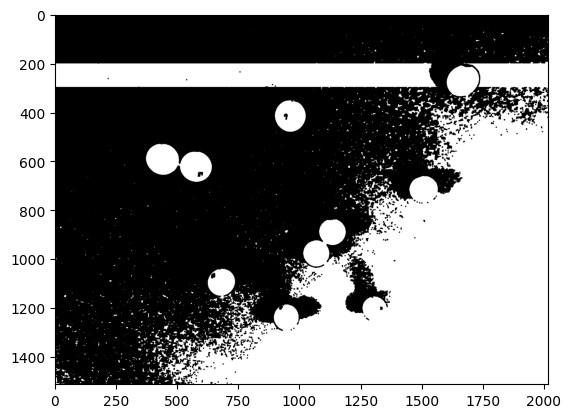

In [9]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.equalizeHist(img2)
_, img2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((5,5), np.uint8) 
img2 = cv2.erode(img2, kernel)
plt.imshow(img2, cmap="gray")

In [10]:
# cv2.namedWindow('sample')
# cv2.imshow("sample", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

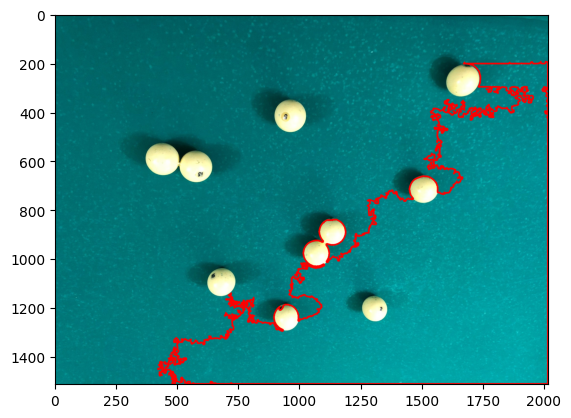

In [11]:
contours, _ = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cv2.drawContours(img, contours, max_index, (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))